<a href="https://colab.research.google.com/github/Kirtiwardhan01/SVM---Shark-Attack/blob/master/Shark_Attack_SVM_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Support Vector Machine </h1>

## Table of Contents
1. [Data Description](#dd)
2. [Loading the packages and dataset](#loading)
3. [Splitting the data into Training and Test data](#split)
4. [Building the SVM model](#build)
5. [Predictions from the model](#pred)
6. [Evaluating the model](#eval)
7. [Hyperparameter Tuning](#tuning)
8. [Appendix](#appendix)

### 1. Data Description  <a id='dd'>

<h3>Prediction of Shark Attacks</h3>
<p/>

It would be pretty awesome if you can predict shark attacks ...right???

**This dataset has 187 rows and 72 columns 
    
Some of the variables are : **Salinity,Turbidity,DissovedO2,Temperature,precipitation state etc**

Use the dataset and implement Machine Learning Algorithms for prediction of shark attacks



**Objective**  <br>
Our goal is to predict the shark attack based on the features.

### 2. Loading the packages and dataset  <a id='loading'>

In [0]:
### Importing the packages
from warnings import filterwarnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', 100)

In [0]:
#Reading the dataset
shark = pd.read_csv(r'sharks.csv',encoding = "ISO-8859-1")

In [0]:
shark.head()

,X.2,X.1,X,Id,Date,ID,TurtleExactCountSC,turtleexactdiscretizeSC,TurtleExactCountNC,TurtleExactCombined,TurtleexactdiscretizeNC,TurtleAttackActivity,TurtleAttackActivityDiscretized,Area,Location,Time,Species,Attack,Timeofattack,Beach,County,MoonPhaseExtended,MoonPhase,Precipitation_Value,StationPressure,WindSpeed,Salinity,Turbidity,Temperature,DissovedO2,PrecipitationValueMod,StationPressureMod,WindSpeedMod,SalinityMod,TurbidityMod,TemperatureMod,DissovedO2Mod,DissolvedO2discretize,salinitydiscretize,turbiditydiscretize,temperaturediscretize,precipitationdiscretize,pressurediscretize,windspeeddiscretize,prepmovingaverage,precipitationmvadiscretize,CrabLandings,CrabLandingsnormalised,CrabLandingsDisc,Degree,Direction,MoonPhase3daysextended,MoonPhase4daysextended,zscorewatertemp,changetemp,Precipitation_Normalised,StationPressure_Normalised,WindSpeed_Normalised,Salinity_Normalised,Turbidity_Normalised,Dissolved02_Normalised,Precipitation_minmax,StationPressure_minmax,WindSpeed_minmax,Salinity_minmax,Turbidity_minmax,Dissolved02_minmax,WaterTemp_minmax,Turtle_minmax,Crablandings_minmax,turbidity_kmeans_binning,turbidty_domain
0,1,1,1,4,5/4/09,25,0.0,Low,0.0,0,Low,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,First quarter,First quarter,0.00,29.96,6.4,24.215556,23.422222,26.008889,82.555556,0.00,29.96,6.4,24.215556,23.422222,26.008889,82.555556,Medium,Medium,Low,High,Low,Medium,Medium,0.220,Low,1070,1.503753,High,223.355556,SW,New,New,-0.449718,EQ,-0.353262,-0.034111,-0.059505,-0.459868,-0.212145,0.897887,0.000000,0.578947,0.333333,0.636021,0.032566,0.741354,0.576733,0.000000,0.933566,Low,Low
1,2,2,2,5,5/5/09,33,0.0,Low,0.0,0,Low,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,Waxing gibbous,First quarter,0.19,30.00,4.4,21.960000,26.844444,24.673333,75.444444,0.19,30.00,4.4,21.960000,26.844444,24.673333,75.444444,Medium,Medium,Low,Medium,Low,Medium,Low,0.060,Low,133,-1.330626,Low,206.222222,SSW,First quarter,New,-0.896383,EQ,0.135168,0.328437,-0.695590,-0.969263,-0.163147,0.469661,0.054286,0.649123,0.202614,0.552312,0.037936,0.675088,0.477558,0.000000,0.114510,Low,Medium
2,3,3,3,7,5/7/09,49,1.0,Low,0.0,0,Low,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,Full,Waxing gibbous,0.00,29.92,7.5,20.451111,20.266667,24.951111,78.511111,0.00,29.92,7.5,20.451111,20.266667,24.951111,78.511111,Medium,Medium,Low,Medium,Low,Medium,Medium,0.062,Low,1061,1.476528,High,212.111111,SSW,Full,Full,-0.803483,EQ,-0.353262,-0.396658,0.290342,-1.310031,-0.257325,0.654333,0.000000,0.508772,0.405229,0.496314,0.027615,0.703665,0.498185,0.000000,0.925699,Low,Low
3,4,4,4,8,5/8/09,57,0.0,Low,0.0,0,Low,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,Full,Waxing gibbous,0.00,29.92,5.4,22.684444,15.488889,25.995556,87.644444,0.00,29.92,5.4,22.684444,15.488889,25.995556,87.644444,High,Medium,Low,High,Low,Medium,Low,0.168,Low,341,-0.701436,Low,222.977778,SW,Full,Full,-0.454177,EQ,-0.353262,-0.396658,-0.377547,-0.805654,-0.325732,1.204337,0.000000,0.508772,0.267974,0.579198,0.020119,0.788776,0.575743,0.000000,0.296329,Low,Low
4,5,5,5,11,5/11/09,81,2.0,Low,0.0,1,Low,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,Full,Full,0.00,29.98,7.2,23.186667,44.733333,26.691111,91.244444,0.00,29.98,7.2,23.186667,44.733333,26.691111,91.244444,High,Medium,Low,High,Low,Medium,Medium,0.000,Low,1140,1.715499,High,34.022222,NE,Full,Full,-0.221555,EQ,-0.353262,0.147163,0.194929,-0.692232,0.092979,1.421126,0.000000,0.614035,0.385621,0.597837,0.066004,0.822323,0.627393,0.004785,0.994755,Low,Medium


In [0]:
shark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 72 columns):
X.2                                186 non-null int64
X.1                                186 non-null int64
X                                  186 non-null int64
Id                                 186 non-null int64
Date                               186 non-null object
ID                                 186 non-null int64
TurtleExactCountSC                 151 non-null float64
turtleexactdiscretizeSC            151 non-null object
TurtleExactCountNC                 149 non-null float64
TurtleExactCombined                186 non-null int64
TurtleexactdiscretizeNC            149 non-null object
TurtleAttackActivity               72 non-null float64
TurtleAttackActivityDiscretized    72 non-null object
Area                               72 non-null object
Location                           72 non-null object
Time                               60 non-null object
Species                

Most of the features are numerical and continuous 

Values in the feature Attack are categorical as they represent shark attack

In [0]:
#Converting column 'Date' into to_datetime format 
shark['Date'] = pd.to_datetime(shark['Date'])

##### Let's check for any missing values

In [0]:
shark_missing = shark.isnull().sum().sort_values(ascending=False)
shark_missing = pd.DataFrame(shark_missing).reset_index()
shark_missing.columns = ['Feature', 'Number of Data Records Missing']
shark_missing.head(21)

,Feature,Number of Data Records Missing
0,Species,134
1,Time,126
2,TurtleAttackActivity,114
3,County,114
4,Beach,114
5,Timeofattack,114
6,TurtleAttackActivityDiscretized,114
7,Area,114
8,Location,114
9,TurtleExactCountNC,37


There are null values in few of the columns that needs to be dealt with and there are 186 observations and 72 columns   

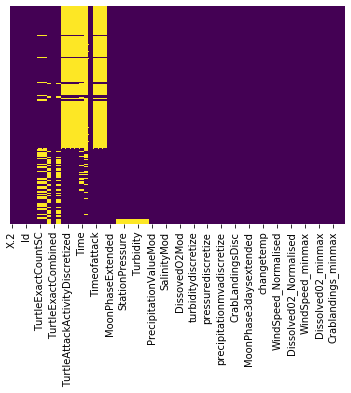

In [0]:
#We first try to clean the data by visualising any NA/null values in the data set

sns.heatmap(shark.isnull(),yticklabels=False,cbar=False,cmap='viridis')

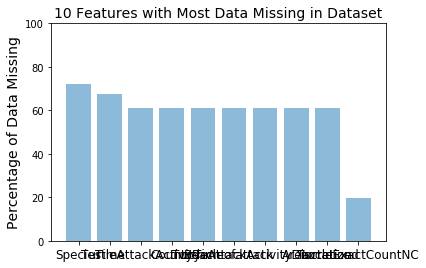

In [0]:
#Visualize the percentage of features with most data missing

shark_missingpercent = 100 * (shark.isnull().sum()/shark.isnull().count()).sort_values(ascending=False)

plt.Figure(figsize=(7,7),dpi = 400)
plt.bar(np.arange(10), shark_missingpercent[:10], align='center', alpha=0.5)
plt.xticks(np.arange(10), shark_missingpercent.index[:10], fontsize=12)
plt.ylim(0, 100)
plt.ylabel('Percentage of Data Missing', fontsize = 14)
plt.title('10 Features with Most Data Missing in Dataset', fontsize = 14) 
# plt.savefig('10 Features with Most Data Missing in Dataset.jpg')
plt.show()


In [0]:
#Removing the columns that has more that 50% of missing values 

shark_null = shark.isnull().sum() / len(shark)
missing_features = shark_null[shark_null > 0.50].index
shark.drop(missing_features, axis=1, inplace=True)

In [0]:
#After removing the columns that has more than 50% of null values we have 63 columns
shark.shape

(186, 63)

In [0]:
#Dealing with Missing values

#Filling NaNs with the meadian as the feature is categorical
shark.TurtleExactCountSC.fillna(shark.TurtleExactCountSC.median(),inplace=True)


In [0]:
#Filling NaNs with the mode as the feature is categorical
shark.turtleexactdiscretizeSC.fillna(shark.turtleexactdiscretizeSC.mode(),inplace=True)


In [0]:
#Filling NaNs with the meadian as the feature is categorical
shark.TurtleExactCountNC.fillna(shark.TurtleExactCountNC.mean(),inplace=True)


In [0]:
#Filling NaNs with the mode as the feature is categorical
shark.turtleexactdiscretizeSC.fillna('Low',inplace=True)

In [0]:
#Filling NaNs with the mode as the feature is categorical
shark.TurtleexactdiscretizeNC.fillna('Low',inplace=True)

In [0]:
#Filling NaNs with the mean as the feature is continuous
shark.Precipitation_Value.fillna(shark.Precipitation_Value.mean(),inplace=True)

#Filling NaNs with the mean as the feature is continuous
shark.StationPressure.fillna(shark.StationPressure.mean(),inplace=True)

#Filling NaNs with the mean as the feature is continuous
shark.WindSpeed.fillna(shark.WindSpeed.mean(),inplace=True)

#Filling NaNs with the mean as the feature is continuous
shark.Salinity.fillna(shark.Salinity.mean(),inplace=True)

#Filling NaNs with the median as there are outliers
shark.Turbidity.fillna(shark.Turbidity.median(),inplace=True)

#Filling NaNs with the mean as the feature is continuous
shark.Temperature.fillna(shark.Temperature.mean(),inplace=True)

#Filling NaNs with the median as there are outliers
shark.DissovedO2.fillna(shark.DissovedO2.median(),inplace=True)

In [0]:
#Cheching for any null values left after missing value imputation
shark.isnull().sum()

X.2                         0
X.1                         0
X                           0
Id                          0
Date                        0
                           ..
WaterTemp_minmax            0
Turtle_minmax               0
Crablandings_minmax         0
turbidity_kmeans_binning    0
turbidty_domain             0
Length: 63, dtype: int64

In [0]:
#Droping few columns as they add no value to the dataset 
shark = shark.drop(columns=['X.2','X.1','Id','ID','X'])

**Descriptive Statistics**


In [0]:
shark.describe()

,TurtleExactCountSC,TurtleExactCountNC,TurtleExactCombined,Precipitation_Value,StationPressure,WindSpeed,Salinity,Turbidity,Temperature,DissovedO2,PrecipitationValueMod,StationPressureMod,WindSpeedMod,SalinityMod,TurbidityMod,TemperatureMod,DissovedO2Mod,prepmovingaverage,CrabLandings,CrabLandingsnormalised,Degree,zscorewatertemp,Precipitation_Normalised,StationPressure_Normalised,WindSpeed_Normalised,Salinity_Normalised,Turbidity_Normalised,Dissolved02_Normalised,Precipitation_minmax,StationPressure_minmax,WindSpeed_minmax,Salinity_minmax,Turbidity_minmax,Dissolved02_minmax,WaterTemp_minmax,Turtle_minmax,Crablandings_minmax
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,1.860000e+02,186.000000,186.000000,186.000000,186.000000,1.860000e+02,1.860000e+02,1.860000e+02,1.860000e+02,1.860000e+02,1.860000e+02,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,37.548387,13.328859,32.596774,0.133187,29.962308,6.551648,26.199711,37.813460,28.167618,67.746115,0.137419,29.963763,6.587097,26.251808,38.239296,28.188147,67.645279,1.453468e-01,593.607527,0.062689,165.351311,0.279116,-2.150538e-10,1.432546e-17,-1.612892e-11,-1.612891e-11,6.451604e-11,-2.688171e-11,0.039263,0.585550,0.345562,0.711591,0.055815,0.602410,0.738559,0.155965,0.517139
std,44.265420,13.898257,41.343829,0.387946,0.109890,3.135080,4.413867,69.919122,2.351918,16.610598,0.389001,0.110330,3.144235,4.427909,69.844007,2.356013,16.605960,1.699017e-01,348.305135,1.053606,64.491867,0.787948,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.111143,0.193562,0.205506,0.164330,0.109588,0.154746,0.174951,0.197817,0.304463
min,0.000000,0.000000,0.000000,0.000000,29.630000,1.300000,7.077778,2.666667,18.242222,3.000000,0.000000,29.630000,1.300000,7.077778,2.666667,18.242222,3.000000,-9.990000e-17,2.000000,-1.726894,13.555556,-3.047213,-3.532620e-01,-3.025128e+00,-1.681521e+00,-4.330267e+00,-5.093154e-01,-3.892896e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,29.900000,4.300000,23.281111,10.632197,26.944444,63.432300,0.000000,29.900000,4.300000,23.281111,10.632197,26.944444,63.432300,3.600000e-02,282.250000,-0.879152,108.738889,-0.136829,-3.532620e-01,-5.779320e-01,-7.273938e-01,-6.709029e-01,-3.952680e-01,-2.537028e-01,0.000000,0.473684,0.196078,0.601342,0.012498,0.563150,0.646205,0.004785,0.244974
50%,23.000000,13.328859,19.500000,0.000000,29.962308,6.100000,26.388889,15.865278,28.434444,70.800000,0.000000,29.970000,6.100000,26.848243,16.044444,28.597778,70.633333,7.400000e-02,578.000000,0.015477,185.888889,0.416114,-3.532620e-01,5.652623e-02,-1.549174e-01,1.346990e-01,-3.177775e-01,1.799387e-01,0.000000,0.596491,0.313725,0.733726,0.020990,0.630255,0.768977,0.093301,0.503497
75%,60.750000,18.000000,46.750000,0.070000,30.040000,7.800000,29.468333,30.788889,30.022778,76.577778,0.070000,30.040000,8.200000,29.468333,34.550000,30.022778,76.577778,2.175000e-01,910.000000,1.019761,215.277778,0.892693,-1.733140e-01,6.909845e-01,5.129717e-01,7.264208e-01,-5.282194e-02,5.379092e-01,0.020000,0.719298,0.450980,0.830963,0.050026,0.685649,0.874794,0.223684,0.793706
max,209.000000,54.000000,209.000000,3.500000,30.200000,16.600000,34.023077,640.000000,31.708889,110.311111,3.500000,30.200000,16.600000,34.023077,640.000000,31.708889,110.311111,1.152000e+00,1146.000000,1.733649,269.688889,1.456598,8.644139e+00,2.141175e+00,3.184528e+00,1.755065e+00,8.615782e+00,2.569308e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**From above we can see that standard deviation is varying alot which implies there's a lot of variance in the dataset**

##### Working on converting categorical features to numeric with the use of LabelEncoder 

In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# encode categorical variables using label Encoder

# select all categorical variables
df_categorical = shark.select_dtypes(include=['object'])
df_categorical.head()

,turtleexactdiscretizeSC,TurtleexactdiscretizeNC,Attack,MoonPhaseExtended,MoonPhase,DissolvedO2discretize,salinitydiscretize,turbiditydiscretize,temperaturediscretize,precipitationdiscretize,pressurediscretize,windspeeddiscretize,precipitationmvadiscretize,CrabLandingsDisc,Direction,MoonPhase3daysextended,MoonPhase4daysextended,changetemp,turbidity_kmeans_binning,turbidty_domain
0,Low,Low,No,First quarter,First quarter,Medium,Medium,Low,High,Low,Medium,Medium,Low,High,SW,New,New,EQ,Low,Low
1,Low,Low,No,Waxing gibbous,First quarter,Medium,Medium,Low,Medium,Low,Medium,Low,Low,Low,SSW,First quarter,New,EQ,Low,Medium
2,Low,Low,No,Full,Waxing gibbous,Medium,Medium,Low,Medium,Low,Medium,Medium,Low,High,SSW,Full,Full,EQ,Low,Low
3,Low,Low,No,Full,Waxing gibbous,High,Medium,Low,High,Low,Medium,Low,Low,Low,SW,Full,Full,EQ,Low,Low
4,Low,Low,No,Full,Full,High,Medium,Low,High,Low,Medium,Medium,Low,High,NE,Full,Full,EQ,Low,Medium


In [0]:
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,turtleexactdiscretizeSC,TurtleexactdiscretizeNC,Attack,MoonPhaseExtended,MoonPhase,DissolvedO2discretize,salinitydiscretize,turbiditydiscretize,temperaturediscretize,precipitationdiscretize,pressurediscretize,windspeeddiscretize,precipitationmvadiscretize,CrabLandingsDisc,Direction,MoonPhase3daysextended,MoonPhase4daysextended,changetemp,turbidity_kmeans_binning,turbidty_domain
0,1,1,0,0,0,2,2,1,0,1,2,2,1,0,9,2,2,1,1,1
1,1,1,0,7,0,2,2,1,2,1,2,1,1,1,8,0,2,1,1,2
2,1,1,0,1,7,2,2,1,2,1,2,2,1,0,8,1,1,1,1,1
3,1,1,0,1,7,0,2,1,0,1,2,1,1,1,9,1,1,1,1,1
4,1,1,0,1,1,0,2,1,0,1,2,2,1,0,3,1,1,1,1,2


In [0]:
# Next, Concatenate df_categorical dataframe with original df (dataframe)

# first, Drop earlier duplicate columns which had categorical values
shark = shark.drop(df_categorical.columns,axis=1)

#Concatenate df_categorical dataframe with original df (dataframe)
shark = pd.concat([shark,df_categorical],axis=1)
shark.head()

,Date,TurtleExactCountSC,TurtleExactCountNC,TurtleExactCombined,Precipitation_Value,StationPressure,WindSpeed,Salinity,Turbidity,Temperature,DissovedO2,PrecipitationValueMod,StationPressureMod,WindSpeedMod,SalinityMod,TurbidityMod,TemperatureMod,DissovedO2Mod,prepmovingaverage,CrabLandings,CrabLandingsnormalised,Degree,zscorewatertemp,Precipitation_Normalised,StationPressure_Normalised,WindSpeed_Normalised,Salinity_Normalised,Turbidity_Normalised,Dissolved02_Normalised,Precipitation_minmax,StationPressure_minmax,WindSpeed_minmax,Salinity_minmax,Turbidity_minmax,Dissolved02_minmax,WaterTemp_minmax,Turtle_minmax,Crablandings_minmax,turtleexactdiscretizeSC,TurtleexactdiscretizeNC,Attack,MoonPhaseExtended,MoonPhase,DissolvedO2discretize,salinitydiscretize,turbiditydiscretize,temperaturediscretize,precipitationdiscretize,pressurediscretize,windspeeddiscretize,precipitationmvadiscretize,CrabLandingsDisc,Direction,MoonPhase3daysextended,MoonPhase4daysextended,changetemp,turbidity_kmeans_binning,turbidty_domain
0,2009-05-04,0.0,0.0,0,0.00,29.96,6.4,24.215556,23.422222,26.008889,82.555556,0.00,29.96,6.4,24.215556,23.422222,26.008889,82.555556,0.220,1070,1.503753,223.355556,-0.449718,-0.353262,-0.034111,-0.059505,-0.459868,-0.212145,0.897887,0.000000,0.578947,0.333333,0.636021,0.032566,0.741354,0.576733,0.000000,0.933566,1,1,0,0,0,2,2,1,0,1,2,2,1,0,9,2,2,1,1,1
1,2009-05-05,0.0,0.0,0,0.19,30.00,4.4,21.960000,26.844444,24.673333,75.444444,0.19,30.00,4.4,21.960000,26.844444,24.673333,75.444444,0.060,133,-1.330626,206.222222,-0.896383,0.135168,0.328437,-0.695590,-0.969263,-0.163147,0.469661,0.054286,0.649123,0.202614,0.552312,0.037936,0.675088,0.477558,0.000000,0.114510,1,1,0,7,0,2,2,1,2,1,2,1,1,1,8,0,2,1,1,2
2,2009-05-07,1.0,0.0,0,0.00,29.92,7.5,20.451111,20.266667,24.951111,78.511111,0.00,29.92,7.5,20.451111,20.266667,24.951111,78.511111,0.062,1061,1.476528,212.111111,-0.803483,-0.353262,-0.396658,0.290342,-1.310031,-0.257325,0.654333,0.000000,0.508772,0.405229,0.496314,0.027615,0.703665,0.498185,0.000000,0.925699,1,1,0,1,7,2,2,1,2,1,2,2,1,0,8,1,1,1,1,1
3,2009-05-08,0.0,0.0,0,0.00,29.92,5.4,22.684444,15.488889,25.995556,87.644444,0.00,29.92,5.4,22.684444,15.488889,25.995556,87.644444,0.168,341,-0.701436,222.977778,-0.454177,-0.353262,-0.396658,-0.377547,-0.805654,-0.325732,1.204337,0.000000,0.508772,0.267974,0.579198,0.020119,0.788776,0.575743,0.000000,0.296329,1,1,0,1,7,0,2,1,0,1,2,1,1,1,9,1,1,1,1,1
4,2009-05-11,2.0,0.0,1,0.00,29.98,7.2,23.186667,44.733333,26.691111,91.244444,0.00,29.98,7.2,23.186667,44.733333,26.691111,91.244444,0.000,1140,1.715499,34.022222,-0.221555,-0.353262,0.147163,0.194929,-0.692232,0.092979,1.421126,0.000000,0.614035,0.385621,0.597837,0.066004,0.822323,0.627393,0.004785,0.994755,1,1,0,1,1,0,2,1,0,1,2,2,1,0,3,1,1,1,1,2


###### Checking for correlation amongst the features 

In [0]:
corr = shark.corr().abs()
corr

,TurtleExactCountSC,TurtleExactCountNC,TurtleExactCombined,Precipitation_Value,StationPressure,WindSpeed,Salinity,Turbidity,Temperature,DissovedO2,PrecipitationValueMod,StationPressureMod,WindSpeedMod,SalinityMod,TurbidityMod,TemperatureMod,DissovedO2Mod,prepmovingaverage,CrabLandings,CrabLandingsnormalised,Degree,zscorewatertemp,Precipitation_Normalised,StationPressure_Normalised,WindSpeed_Normalised,Salinity_Normalised,Turbidity_Normalised,Dissolved02_Normalised,Precipitation_minmax,StationPressure_minmax,WindSpeed_minmax,Salinity_minmax,Turbidity_minmax,Dissolved02_minmax,WaterTemp_minmax,Turtle_minmax,Crablandings_minmax,turtleexactdiscretizeSC,TurtleexactdiscretizeNC,Attack,MoonPhaseExtended,MoonPhase,DissolvedO2discretize,salinitydiscretize,turbiditydiscretize,temperaturediscretize,precipitationdiscretize,pressurediscretize,windspeeddiscretize,precipitationmvadiscretize,CrabLandingsDisc,Direction,MoonPhase3daysextended,MoonPhase4daysextended,changetemp,turbidity_kmeans_binning,turbidty_domain
TurtleExactCountSC,1.000000,0.316572,0.948150,0.096900,0.084832,0.204252,0.267435,0.128168,0.078394,0.006634,0.082995,0.067951,0.217792,0.251835,0.135951,0.089183,0.014250,0.070279,0.083293,0.083293,0.225245,0.089183,0.082995,0.067951,0.217792,0.251835,0.135951,0.014250,0.082995,0.067951,0.217792,0.251835,0.135951,0.014250,0.089183,0.948150,0.083293,0.335718,0.167202,0.260657,0.083656,0.051291,0.036443,0.142743,0.042000,0.180968,0.023469,0.017767,0.054196,0.105986,0.066624,0.220983,1.660689e-02,0.002777,6.829710e-02,0.076864,0.023084
TurtleExactCountNC,0.316572,1.000000,0.406081,0.073926,0.046469,0.296624,0.251324,0.241596,0.259183,0.177931,0.073725,0.046284,0.295761,0.250527,0.241856,0.258733,0.177981,0.074583,0.010193,0.010193,0.324432,0.258733,0.073725,0.046284,0.295761,0.250527,0.241856,0.177981,0.073725,0.046284,0.295761,0.250527,0.241856,0.177981,0.258733,0.406081,0.010193,0.144039,0.051498,0.396961,0.015580,0.136363,0.106470,0.199916,0.269232,0.275520,0.045439,0.051018,0.000482,0.021424,0.044005,0.295673,7.648302e-02,0.006150,8.208184e-02,0.004397,0.175270
TurtleExactCombined,0.948150,0.406081,1.000000,0.102034,0.021553,0.303145,0.332266,0.209851,0.069859,0.032884,0.085841,0.002166,0.318754,0.314001,0.218995,0.082484,0.041776,0.095673,0.160236,0.160236,0.256188,0.082484,0.085841,0.002166,0.318754,0.314001,0.218995,0.041776,0.085841,0.002166,0.318754,0.314001,0.218995,0.041776,0.082484,1.000000,0.160236,0.278079,0.016243,0.417346,0.043448,0.013434,0.037717,0.197855,0.078059,0.173794,0.023691,0.017545,0.045103,0.085020,0.162462,0.275259,3.145768e-02,0.027146,6.188774e-02,0.112332,0.025384
Precipitation_Value,0.096900,0.073926,0.102034,1.000000,0.166599,0.000947,0.136756,0.014518,0.050704,0.129020,0.997288,0.165934,0.000944,0.136322,0.014534,0.050616,0.129056,0.465710,0.131913,0.131913,0.184518,0.050616,0.997288,0.165934,0.000944,0.136322,0.014534,0.129056,0.997288,0.165934,0.000944,0.136322,0.014534,0.129056,0.050616,0.102034,0.131913,0.028383,0.041271,0.109456,0.093215,0.058372,0.076794,0.109280,0.063354,0.020366,0.204750,0.118083,0.114716,0.349379,0.066977,0.234566,3.024345e-02,0.005510,2.482447e-01,0.026105,0.013409
StationPressure,0.084832,0.046469,0.021553,0.166599,1.000000,0.003457,0.017813,0.108535,0.059583,0.150417,0.166147,0.996010,0.003447,0.017757,0.108652,0.059479,0.150459,0.106882,0.009127,0.009127,0.089571,0.059479,0.166147,0.996010,0.003447,0.017757,0.108652,0.150459,0.166147,0.996010,0.003447,0.017757,0.108652,0.150459,0.059479,0.021553,0.009127,0.062737,0.118461,0.095989,0.024896,0.054864,0.145814,0.061029,0.086422,0.019595,0.118677,0.585709,0.106749,0.058391,0.037369,0.061074,1.631381e-02,0.103575,2.696031e-03,0.001670,0.059083
WindSpeed,0.204252,0.296624,0.303145,0.000947,0.003457,1.000000,0.199624,0.212624,0.074705,0.000384,0.000944,0.003443,0.997088,0.198991,0.212852,0.074575,0.000384,0.090842,0.210544,0.210544,0.173178,0.074575,0.000944,0.003443,0.997088,0.198991,0.212852,0.000384,0.000944,0.003443,0.99708

### 3. Splitting the data in Training and Test data   <a id='split'>

In [0]:
#Spliting the dataset into labels and predictors
X = shark.drop(['Date','Attack'], axis=1)
y = shark['Attack']

In [0]:
y.value_counts()

0    114
1     72
Name: Attack, dtype: int64

**We have observed that there is a lot of variance in the data. So we should scale the data using MinMax Scaler**

In [0]:
#Now before splitting the dataset let's scale the features
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#scaler_X = scaler.fit_transform(X.values)

In [0]:
# Lets create our train and validation split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

### 4. Building the SVM model  <a id='build'>

In [0]:
#Importing SVM algorithm from sklearn package
from sklearn.svm import SVC
svc = SVC(kernel='linear',C=10)

In [0]:
svc_model = svc.fit(X=X_train, y=y_train)

### 5. Predictions from the model  <a id='pred'>

In [0]:
y_pred = svc.predict(X_test)

### 6. Evaluating the model   <a id='eval'>

In [0]:
#Importing cross_validation module
from sklearn.model_selection import cross_val_score 

score_kfold = cross_val_score(svc, X_train, y_train, cv=5)
print("Cross Validation:" + str(score_kfold))
print("Cross Validation Mean:" + str(score_kfold.mean()))

Cross Validation:[0.73076923 0.73076923 0.88461538 0.57692308 0.73076923]
Cross Validation Mean:0.7307692307692306


In [0]:
#importing accuracy, classification report and confusion matrix modules

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuarcy = accuracy_score(y_pred, y_test)
accuarcy

0.75

In [0]:
#Classification Report
cls_rpt = classification_report(y_pred, y_test)
print(cls_rpt)

              precision    recall  f1-score   support

           0       0.81      0.70      0.75        30
           1       0.70      0.81      0.75        26

    accuracy                           0.75        56
   macro avg       0.75      0.75      0.75        56
weighted avg       0.76      0.75      0.75        56



In [0]:
#Confusion Matrix
cf = confusion_matrix(y_test,y_pred)
cf

array([[21,  5],
       [ 9, 21]])

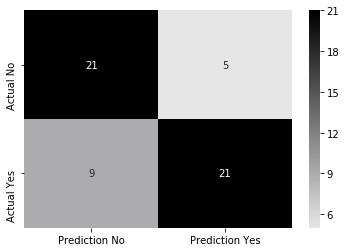

In [0]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(cf,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')

### 7. Hyperparameter Tuning   <a id='tuning'>

In [0]:
#let's try different kernel sucj as Gaussian kernel 'rbf'
svc2 = SVC(kernel='rbf')

In [0]:
svc2.fit(X=X_train,y=y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred2 = svc2.predict(X_test)

In [0]:
score_kfold2 = cross_val_score(svc2, X_train, y_train, cv=4)
print("Cross Validation:" + str(score_kfold2))
print("Cross Validation Mean:" + str(score_kfold2.mean()))

Cross Validation:[0.66666667 0.66666667 0.71875    0.71875   ]
Cross Validation Mean:0.6927083333333333


In [0]:
#importing accuracy, classification report and confusion matrix modules

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuarcy2 = accuracy_score(y_pred2, y_test)
accuarcy2

0.5535714285714286

In [0]:
#Classification Report
cls_rpt2 = classification_report(y_pred2, y_test)
print(cls_rpt2)

              precision    recall  f1-score   support

           0       1.00      0.51      0.68        51
           1       0.17      1.00      0.29         5

    accuracy                           0.55        56
   macro avg       0.58      0.75      0.48        56
weighted avg       0.93      0.55      0.64        56



In [0]:
#Confusion Matrix
cf2 = confusion_matrix(y_test,svc2.predict(X_test))
cf2

array([[26,  0],
       [25,  5]])

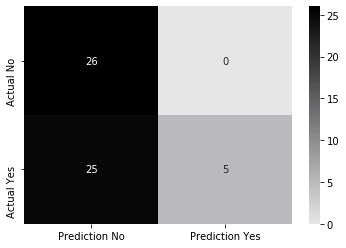

In [0]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(cf2,cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')

### AUC

**AUC is the percentage of the ROC plot that is underneath the curve**

In [0]:
#AUC ROC for model1 (kernel = linear)
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, y_pred))

0.7538461538461538


In [0]:
#AUC ROC for model1 (kernel = rbf)
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, y_pred2 ))

0.5833333333333334


### 8. Appendix <a id='appendix'>

In [0]:
#Parameters we want tp predict

Cs = [0.01, 0.1, 1, 10]
gammas = [0.01,0.1,1]
#kernels = ['rbf','linear']

param_grid = {'C':Cs,'gamma':gammas}

In [0]:

# Importing Grid Search 

from sklearn.model_selection import GridSearchCV

In [0]:
#Building the model
grid_cls = SVC(kernel='rbf')
grid_search = GridSearchCV(grid_cls,param_grid,cv=3)

In [0]:
grid_search.fit(X,y)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
#Best Score
grid_search.best_score_

0.6129032258064516

In [0]:
#Best Param
grid_search.best_params_

{'C': 0.01, 'gamma': 0.01}

In [0]:
#Building the model
grid_cls2 = SVC(kernel='linear')
grid_search2 = GridSearchCV(grid_cls,param_grid,cv=3)

In [0]:
grid_search2.fit(X,y)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
#Best Score
grid_search2.best_score_

0.6129032258064516

In [0]:
#Best Param
grid_search2.best_params_

{'C': 0.01, 'gamma': 0.01}

The best SVM model can be built with C=0.01 and gamma=0.01.  <br>

#### Calculate null accuracy (for multi-class classification problems)

In [0]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

1    0.535714
Name: Attack, dtype: float64

### The End